<a href="https://colab.research.google.com/github/gollapalli-sai/CNN_Classification/blob/main/animlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PIL import Image
import os

def load_image(image_path):
    """Load image from local path and convert to grayscale"""
    try:
        if not os.path.exists(image_path):
            print(f"Error: Image file not found at {image_path}")
            return None

        img = Image.open(image_path)
        # Convert to grayscale
        img_gray = img.convert('L')
        # Resize if too large
        if img_gray.size[0] > 512 or img_gray.size[1] > 512:
            img_gray.thumbnail((512, 512), Image.Resampling.LANCZOS)
        return np.array(img_gray)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def apply_convolution(image, kernel):
    """Apply 2D convolution operation"""
    return signal.convolve2d(image, kernel, mode='same', boundary='symm')

def get_filters():
    """Return a dictionary of common CNN filters"""
    filters = {}

    # Edge detection filters
    filters['Sobel X'] = np.array([[-1, 0, 1],
                                    [-2, 0, 2],
                                    [-1, 0, 1]])

    filters['Sobel Y'] = np.array([[-1, -2, -1],
                                    [0, 0, 0],
                                    [1, 2, 1]])

    filters['Laplacian'] = np.array([[0, 1, 0],
                                      [1, -4, 1],
                                      [0, 1, 0]])

    filters['Prewitt X'] = np.array([[-1, 0, 1],
                                      [-1, 0, 1],
                                      [-1, 0, 1]])

    filters['Prewitt Y'] = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])

    # Blur filters
    filters['Box Blur 3x3'] = np.ones((3, 3)) / 9

    filters['Box Blur 5x5'] = np.ones((5, 5)) / 25

    filters['Gaussian 3x3'] = np.array([[1, 2, 1],
                                         [2, 4, 2],
                                         [1, 2, 1]]) / 16

    filters['Gaussian 5x5'] = np.array([[1, 4, 6, 4, 1],
                                         [4, 16, 24, 16, 4],
                                         [6, 24, 36, 24, 6],
                                         [4, 16, 24, 16, 4],
                                         [1, 4, 6, 4, 1]]) / 256

    # Sharpening filter
    filters['Sharpen'] = np.array([[0, -1, 0],
                                    [-1, 5, -1],
                                    [0, -1, 0]])

    filters['Strong Sharpen'] = np.array([[-1, -1, -1],
                                           [-1, 9, -1],
                                           [-1, -1, -1]])

    # Emboss filter
    filters['Emboss'] = np.array([[-2, -1, 0],
                                   [-1, 1, 1],
                                   [0, 1, 2]])

    # Outline filter
    filters['Outline'] = np.array([[-1, -1, -1],
                                    [-1, 8, -1],
                                    [-1, -1, -1]])

    # Identity filter
    filters['Identity'] = np.array([[0, 0, 0],
                                     [0, 1, 0],
                                     [0, 0, 0]])

    # Horizontal and Vertical edge detection
    filters['Horizontal Edges'] = np.array([[-1, -1, -1],
                                             [2, 2, 2],
                                             [-1, -1, -1]])

    filters['Vertical Edges'] = np.array([[-1, 2, -1],
                                           [-1, 2, -1],
                                           [-1, 2, -1]])

    return filters

def main():
    """Main demonstration function"""

    # Load image from local path
    # Replace this path with your image file path
    image_path = "/content/zebra.jpg"  # Change this to your image path

    print(f"Loading image from: {image_path}")
    img = load_image(image_path)

    if img is None:
        print("\nPlease provide a valid image path.")
        print("Example paths:")
        print("  - image.jpg")
        print("  - /path/to/your/image.png")
        print("  - C:\\Users\\YourName\\Pictures\\photo.jpg (Windows)")
        return

    print(f"Image loaded successfully! Size: {img.shape}")

    # Get all filters
    filters = get_filters()

    # Create visualization of all filters
    n_filters = len(filters)
    cols = 4
    rows = (n_filters + cols) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(16, 4*rows))
    axes = axes.flatten()

    # Show original image
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # Apply each filter
    print("\nApplying filters...")
    for idx, (name, kernel) in enumerate(filters.items(), start=1):
        print(f"  - Applying {name} filter...")
        filtered = apply_convolution(img, kernel)
        axes[idx].imshow(filtered, cmap='gray')
        axes[idx].set_title(f'{name}\nKernel: {kernel.shape[0]}x{kernel.shape[1]}',
                           fontsize=11)
        axes[idx].axis('off')

    # Hide extra subplots
    for idx in range(len(filters) + 1, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('cnn_filters_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Show kernel visualizations
    print("\nGenerating kernel visualizations...")
    fig, axes = plt.subplots(4, 4, figsize=(14, 14))
    axes = axes.flatten()

    for idx, (name, kernel) in enumerate(filters.items()):
        if idx >= 16:
            break
        im = axes[idx].imshow(kernel, cmap='RdBu', interpolation='nearest',
                              vmin=-2, vmax=2)
        axes[idx].set_title(name, fontsize=10, fontweight='bold')
        axes[idx].axis('off')

        # Add text annotations for kernel values
        for i in range(kernel.shape[0]):
            for j in range(kernel.shape[1]):
                text_color = "white" if abs(kernel[i, j]) > 1 else "black"
                axes[idx].text(j, i, f'{kernel[i, j]:.2f}',
                              ha="center", va="center", color=text_color,
                              fontsize=8, fontweight='bold')

        plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

    # Hide unused subplots
    for idx in range(len(filters), 16):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('kernel_visualizations.png', dpi=150, bbox_inches='tight')
    print("Saved: kernel_visualizations.png")
    plt.show()

    # Demonstrate edge detection combination
    print("\nDemonstrating edge magnitude (combining Sobel X and Y)...")
    sobel_x = apply_convolution(img, filters['Sobel X'])
    sobel_y = apply_convolution(img, filters['Sobel Y'])
    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    edge_direction = np.arctan2(sobel_y, sobel_x)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(sobel_x, cmap='gray')
    axes[0, 1].set_title('Sobel X\n(Vertical Edges)', fontsize=12)
    axes[0, 1].axis('off')

    axes[0, 2].imshow(sobel_y, cmap='gray')
    axes[0, 2].set_title('Sobel Y\n(Horizontal Edges)', fontsize=12)
    axes[0, 2].axis('off')

    axes[1, 0].imshow(edge_magnitude, cmap='gray')
    axes[1, 0].set_title('Edge Magnitude\n√(Sx² + Sy²)', fontsize=12)
    axes[1, 0].axis('off')

    axes[1, 1].imshow(edge_direction, cmap='hsv')
    axes[1, 1].set_title('Edge Direction\narctan(Sy/Sx)', fontsize=12)
    axes[1, 1].axis('off')

    # Thresholded edges
    threshold = np.percentile(edge_magnitude, 70)
    edges_binary = edge_magnitude > threshold
    axes[1, 2].imshow(edges_binary, cmap='gray')
    axes[1, 2].set_title('Thresholded Edges\n(Top 30%)', fontsize=12)
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.savefig('edge_detection_demo.png', dpi=150, bbox_inches='tight')
    print("Saved: edge_detection_demo.png")
    plt.show()

    # Compare blur filters
    print("\nComparing different blur filters...")
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')

    blur_filters = ['Box Blur 3x3', 'Box Blur 5x5', 'Gaussian 3x3',
                    'Gaussian 5x5', 'Sharpen']

    for idx, name in enumerate(blur_filters, start=1):
        row = idx // 3
        col = idx % 3
        filtered = apply_convolution(img, filters[name])
        axes[row, col].imshow(filtered, cmap='gray')
        axes[row, col].set_title(name, fontsize=12)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig('blur_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()

Loading image from: /content/zebra.jpg
Error: Image file not found at /content/zebra.jpg

Please provide a valid image path.
Example paths:
  - image.jpg
  - /path/to/your/image.png
  - C:\Users\YourName\Pictures\photo.jpg (Windows)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


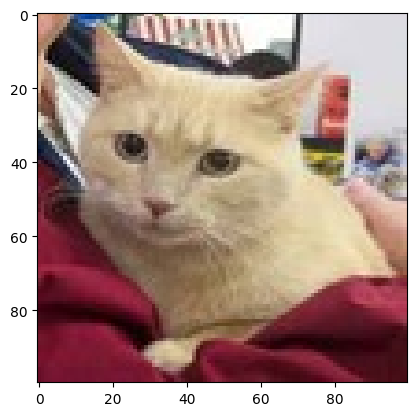

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 769ms/step - accuracy: 0.4816 - loss: 0.7329
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 684ms/step - accuracy: 0.6066 - loss: 0.6673
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 683ms/step - accuracy: 0.6634 - loss: 0.6150
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 686ms/step - accuracy: 0.7285 - loss: 0.5523
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 706ms/step - accuracy: 0.7870 - loss: 0.4490
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.7013 - loss: 0.5873


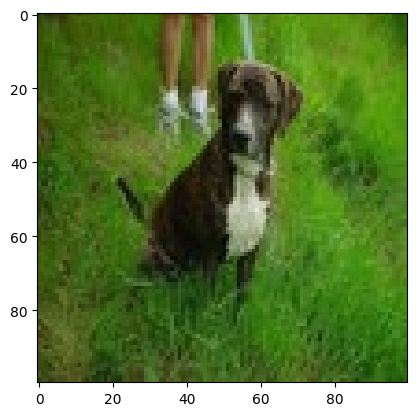

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Our model says it is a : dog


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

X_train = np.loadtxt("input.csv", delimiter=",")
Y_train = np.loadtxt("labels.csv", delimiter=",")

X_test = np.loadtxt("input_test.csv", delimiter=",")
Y_test = np.loadtxt("labels_test.csv", delimiter=",")

X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

model = Sequential([
    Conv2D(32,(3,3),activation = 'relu' , input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

model.compile(loss = "binary_crossentropy",optimizer = 'adam',metrics = ['accuracy'])

model.fit(X_train,Y_train,epochs = 5,batch_size = 64)

model.evaluate(X_test,Y_test)

model.save("model.h5")
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = "dog"
else:
  pred = "cat"
print("Our model says it is a :",pred)